In [1]:
import torch
import snntorch as snn
import matplotlib.pyplot as plt
print("torch version:", torch.__version__)
print("snn version:", snn.__version__)

torch version: 2.8.0+cu128
snn version: 0.9.4


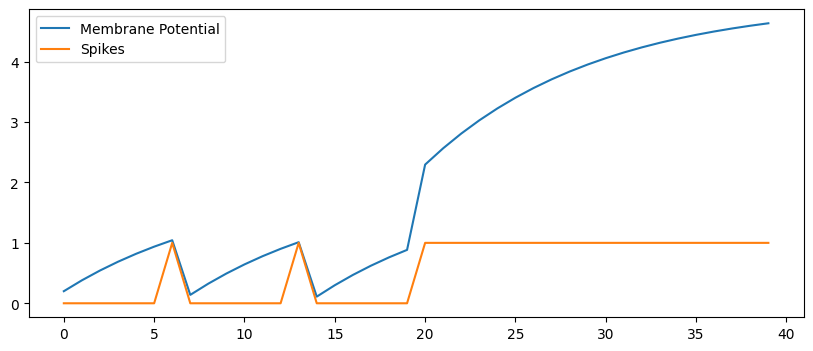

In [3]:
# A singular neuron

inputs = torch.cat((torch.ones(20)*0.2, torch.ones(20)*1.5))

#Make an LIF neuron
lif = snn.Leaky(beta=0.9, threshold=1.0)

# Init membrane potential
mem = lif.init_leaky()

spikes, voltages = [], []

for I in inputs:
    spk, mem = lif(I, mem)
    spikes.append(spk.item())
    voltages.append(mem.item())

# Plot results
plt.figure(figsize=(10,4))
plt.plot(voltages, label="Membrane Potential")
plt.plot(spikes, label="Spikes")
plt.legend()
plt.show()


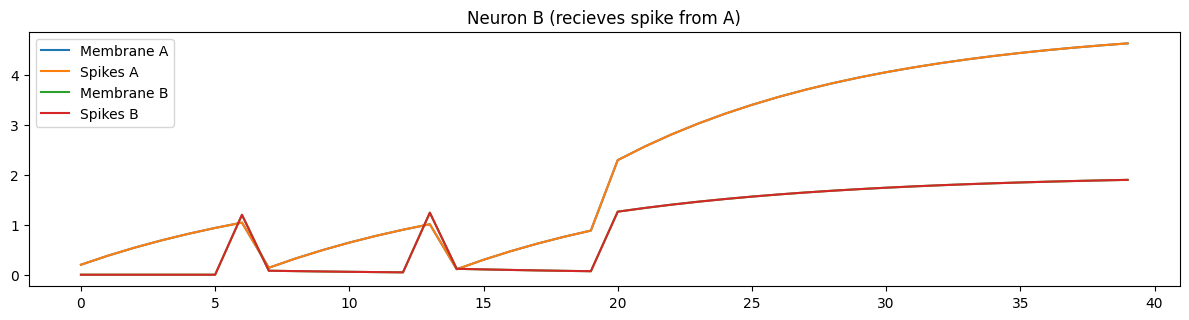

In [7]:
# Two LIF Neurons with a weighted connection

inputs = torch.cat((torch.ones(20)*0.2, torch.ones(20)*1.5))

# Create neurons
neuron_A = snn.Leaky(beta=0.9, threshold=1.0)
neuron_B = snn.Leaky(beta=0.9, threshold=1.0)

# Init membrane potentials
mem_A = neuron_A.init_leaky()
mem_B = neuron_B.init_leaky()


# Connection weight from A -> B
w_AB = 1.2 #strength of connection

#Simulate
spikes_A, volts_A = [], []
spikes_B, volts_B = [], []

for I in inputs:
    spk_A, mem_A = neuron_A(I, mem_A)

    input_B = spk_A * w_AB

    spk_B, mem_B = neuron_B(input_B, mem_B)

    # Record values
    spikes_A.append(spk_A.item())
    volts_A.append(mem_A.item())
    spikes_B.append(spk_B.item())
    volts_B.append(mem_B.item())

# Plot
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(volts_A, label="Membrane A")
plt.plot(volts_A, label="Spikes A")
plt.title("Neuron A")
plt.legend()

plt.subplot(2,1,1)
plt.plot(volts_B, label="Membrane B")
plt.plot(volts_B, label="Spikes B")
plt.title("Neuron B (recieves spike from A)")
plt.legend()

plt.tight_layout()
plt.show()